In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

X, y = make_classification(n_features = 5, n_redundant = 0, n_informative = 5, n_clusters_per_class=1)

df = pd.DataFrame(X, columns = ['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.275199,-1.557352,0.595295,-1.297119,-1.605668,0
1,-0.922756,-1.353780,-0.955568,0.600491,-0.956781,0
2,2.578047,-1.533983,2.535343,-1.340693,-2.268021,1
3,-0.230891,-0.643307,0.200123,-2.115920,-0.046964,1
4,-2.725008,-1.226331,0.379470,0.316617,-1.264446,1


In [32]:
# function for row sampling
def sample_rows(df , percent):
    return df.sample(int(percent*df.shape[0]),replace = True)

In [1]:
# function for feature sampling
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent*df.shape[1]-1))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [34]:
# function for combined sampling
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df , col_percent)

In [35]:
df1 = sample_rows(df,0.2)

In [36]:
df2 = sample_rows(df,0.2)

In [37]:
df3 = sample_rows(df, 0.2)

In [38]:
df1.shape

(20, 6)

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


In [40]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [41]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])
# all rows, but 5 cols(0 to 4)

DecisionTreeClassifier()

[Text(0.2857142857142857, 0.9, 'x[4] <= -2.081\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.21428571428571427, 0.8, 'True  '),
 Text(0.42857142857142855, 0.7, 'x[4] <= -1.307\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.3571428571428571, 0.8, '  False'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5714285714285714, 0.5, 'x[0] <= -1.345\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7142857142857143, 0.3, 'x[1] <= -0.111\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

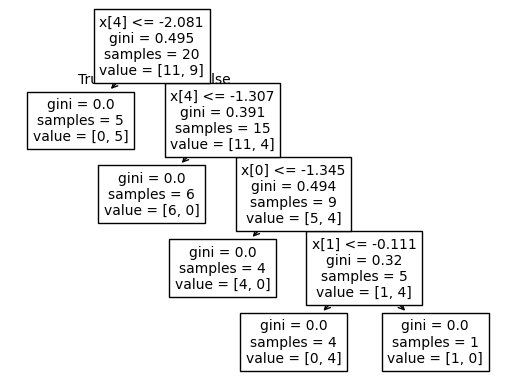

In [42]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.625, 0.875, 'x[2] <= 0.681\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.5, 0.625, 'x[0] <= 0.172\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'x[3] <= 0.191\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.375, 'x[4] <= -1.11\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6875, 0.75, '  False')]

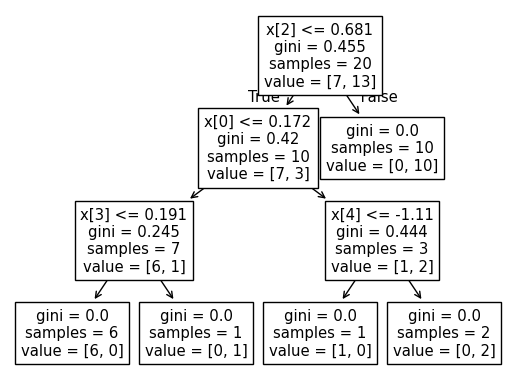

In [43]:
plot_tree(clf2)

[Text(0.4444444444444444, 0.9166666666666666, 'x[3] <= -2.126\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.38888888888888884, 0.8333333333333333, 'True  '),
 Text(0.5555555555555556, 0.75, 'x[1] <= 0.632\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.5, 0.8333333333333333, '  False'),
 Text(0.4444444444444444, 0.5833333333333334, 'x[1] <= -2.164\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[4] <= -3.205\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.4166666666666667, 'x[1] <= -0.389\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.7777777777777778, 0.25, 'x[0] <= -1.963\ngini = 0.375\n

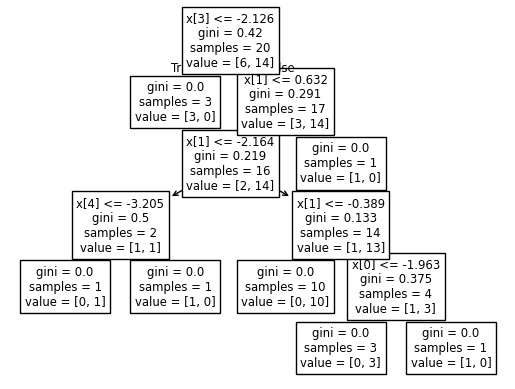

In [44]:
plot_tree(clf3)

In [46]:
print("clf 1 prediction " , clf1.predict(np.array([-0.275199	,-1.557352,	0.595295,-1.297119,	-1.605668]).reshape(1,5)))
print("clf 2 prediction " , clf2.predict(np.array([-0.275199	,-1.557352,	0.595295,-1.297119,	-1.605668]).reshape(1,5)))
print("clf 3 prediction " , clf3.predict(np.array([-0.275199	,-1.557352,	0.595295,-1.297119,	-1.605668]).reshape(1,5)))

clf 1 prediction  [0]
clf 2 prediction  [0]
clf 3 prediction  [1]


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# due to majority count,  random forest will answer 0 as clf 1 and clf 2 predict 0 and clf 3 predict 1